In [1]:
import numpy as np
from age_predictor.feature_extractor import *
from age_predictor.supervised import *
from age_predictor import ML_plot

# 数据预处理

In [2]:
# 类实例化一个data对象，用于处理数据
data = Data()

In [3]:
training_data = 'data.xlsx'
label_col = 'age'
drop_col = ['cultivation region']
# 读取数据
data.load_data(training_data, label_col, drop_col)

Number of data set: 106
Number of features: 9


In [4]:
data.df_x_columns = [i.split('(')[0].strip(' ') for i in data.df_x_columns]

In [5]:
# 数据归一化
data.feature_standardize('MinMaxScaler')

# 数据分割

In [6]:
# 数据分割
data.data_sampling(stratify='random', test_size=0.2, rand=1)

number of training set: 84
number of test set: 22


# PCA分析

In [7]:
# 实例化一个plot对象，用于作图
plot = ML_plot.MLPlot()

explained variance: [0.1667645  0.11553514 0.0714414 ]
explained variance ratio: [0.35517492 0.24606666 0.15215584]
explained variance ratio (sum): 0.753397419759446


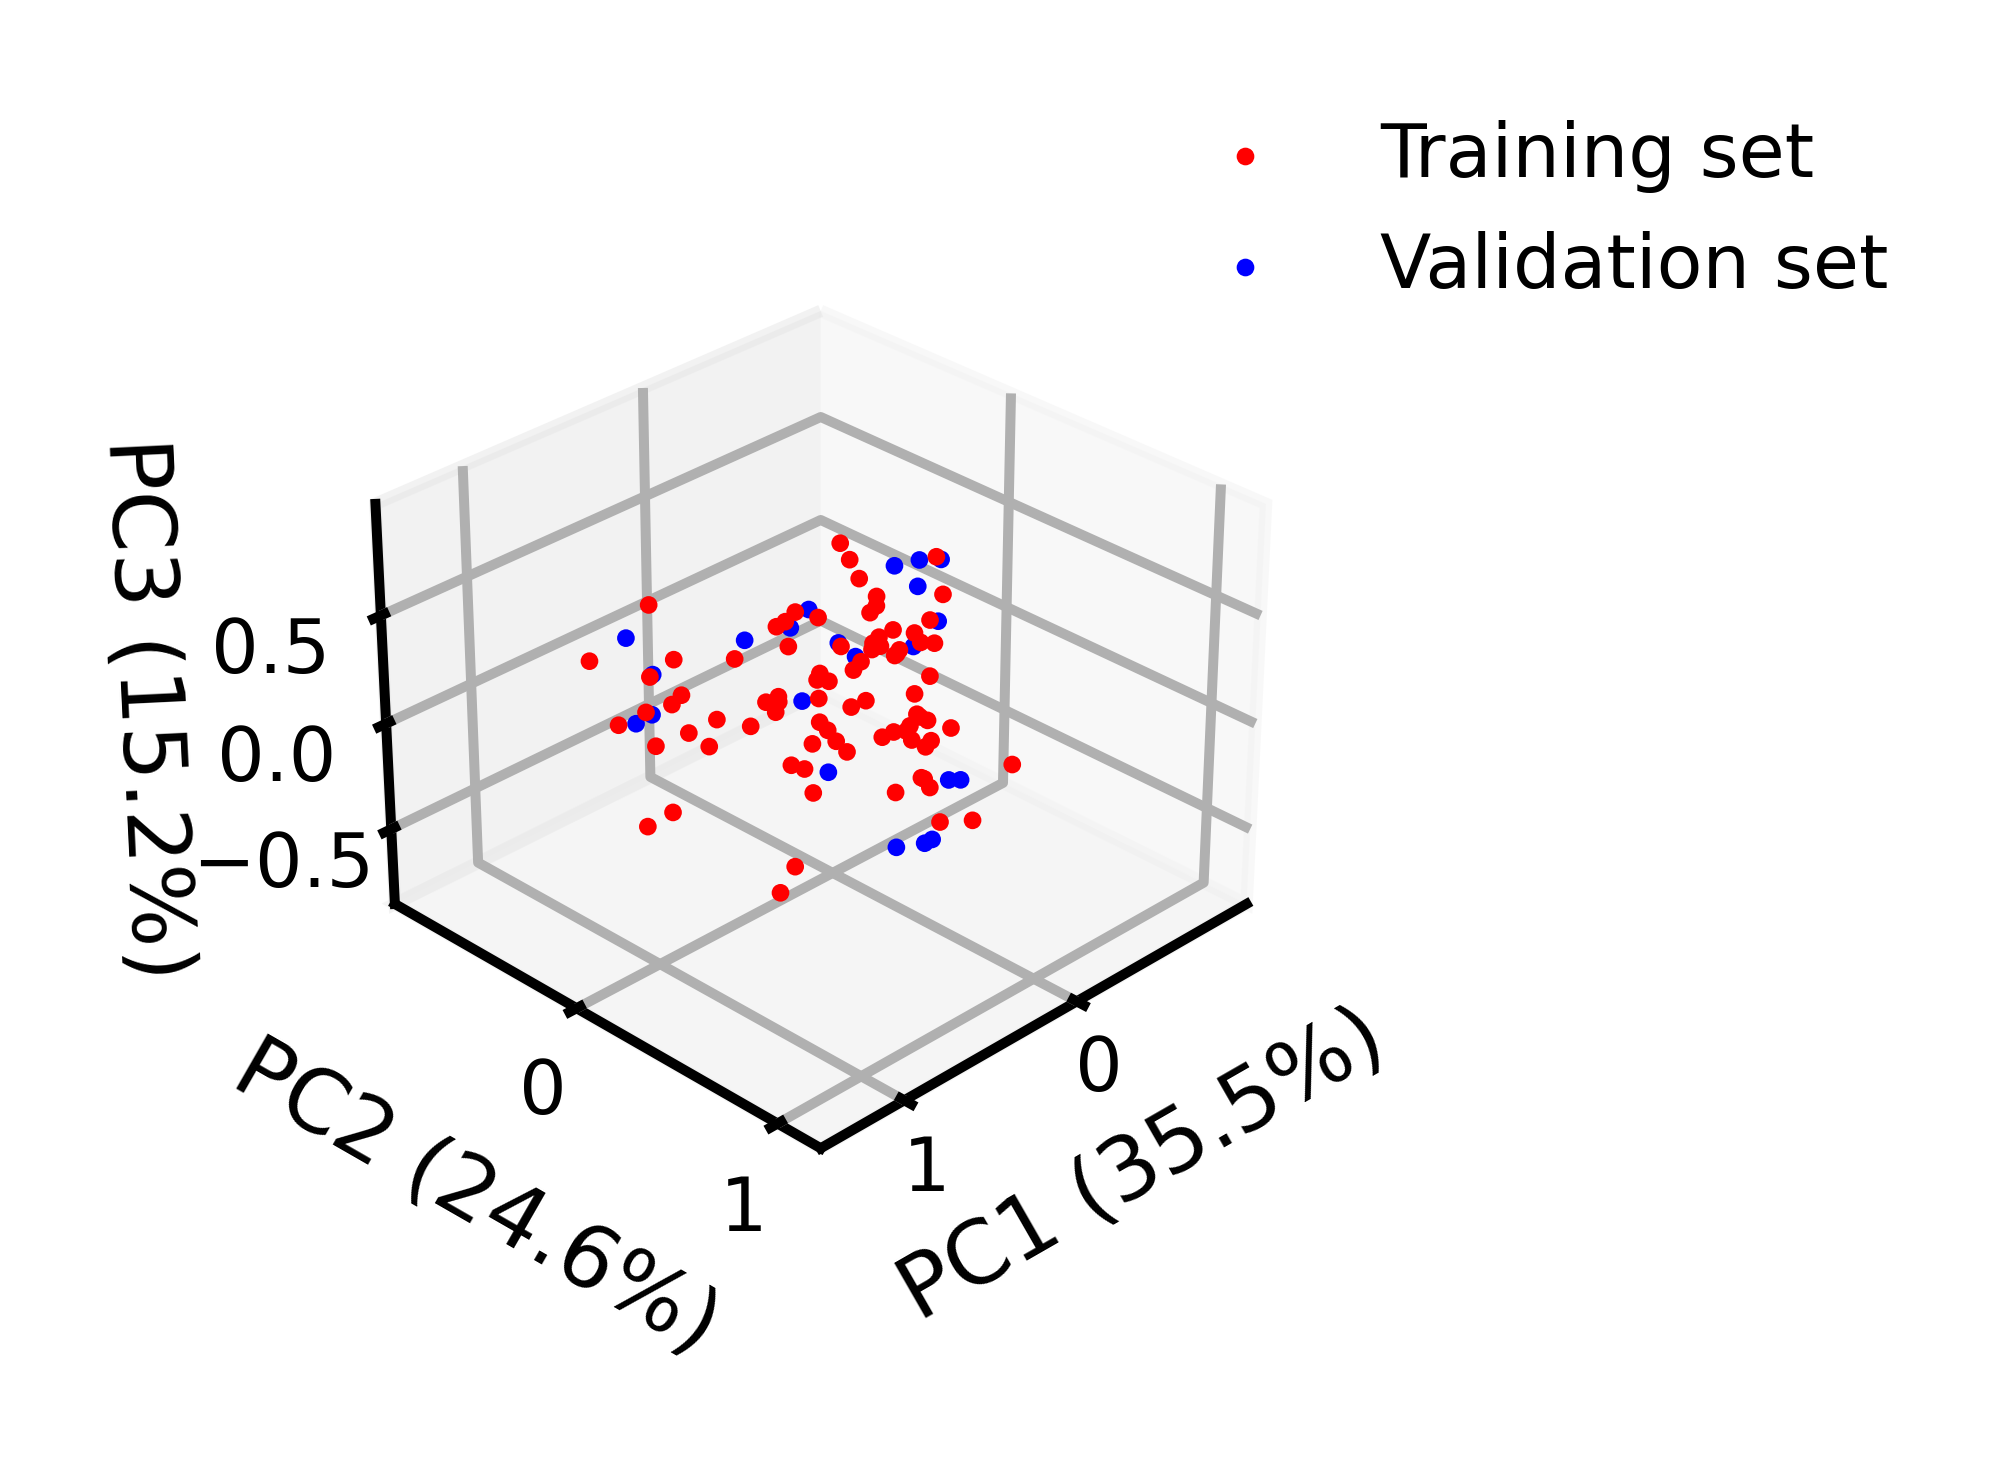

explained variance: [0.1667645  0.11553514 0.0714414 ]
explained variance ratio: [0.35517492 0.24606666 0.15215584]
explained variance ratio (sum): 0.753397419759446


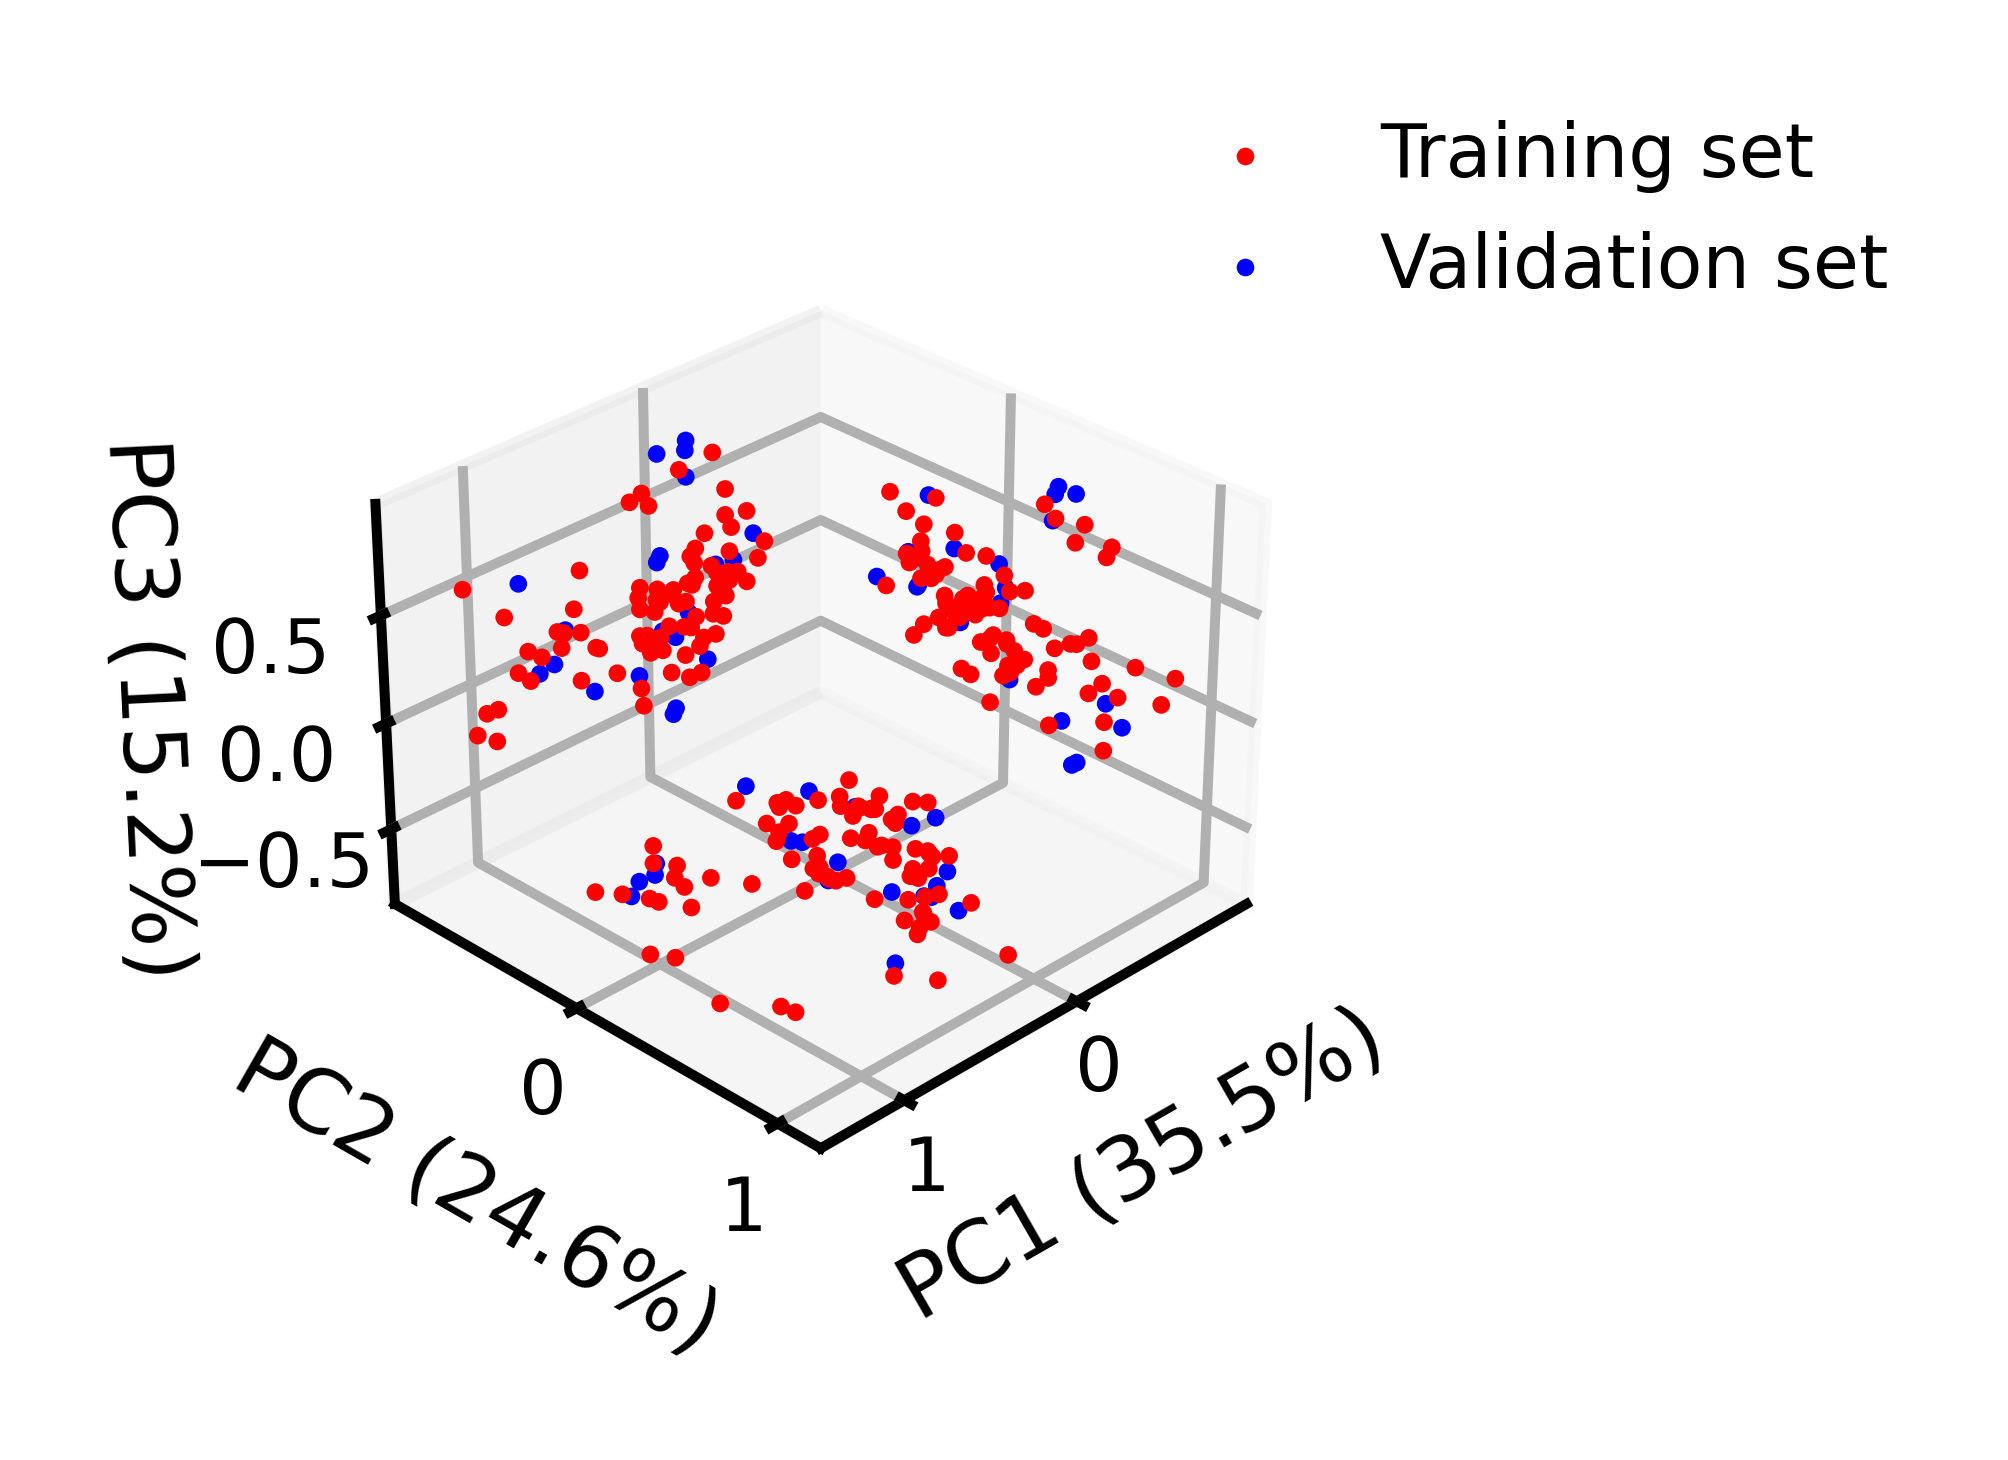

In [8]:
# PCA三维图
plot.plot_pca(data.x_train, data.x_test, elev=30, azim=45, project=False)
# PCA三维投影图
plot.plot_pca(data.x_train, data.x_test, elev=30, azim=45, project=True)

# 模型训练

In [9]:
# 实例化一个model对象，用于模型训练
model = RegressionModel(data=data)

84 training data and 22 test data detected in Data!


In [10]:
# 设置算法和需要网格调参的参数
candidates = {
    'LinearRegression':{},
    'RandomForestRegressor':
        {
            'n_estimators': np.arange(50, 500, 100),
            'min_samples_split': np.arange(2, 12, 3),
            'min_samples_leaf': np.arange(2, 12, 3),
            'max_depth': np.arange(5, 12, 2),
            'max_features': ['sqrt', 'log2', 'auto']
        },
}

In [11]:
# 设置参数
model.set_candidates(candidates)

In [12]:
# 网格调参，评价指标选择均方误差和决定系数
tune_df = model.model_tuning(scoring=['neg_mean_squared_error', 'r2'])

Tuning:  LinearRegression
Using time: 1.29

Tuning:  RandomForestRegressor
Using time: 462.97

================ model_tuning | Time: 0.0h 7.0min 44s ================



In [13]:
# 以均方误差作为标准，选择最佳参数
best_df = model.best_model_select(rank='neg_mean_squared_error')

,rank_test_neg_mean_squared_error,rank_test_r2,mean_test_neg_mean_squared_error,mean_test_r2,std_test_neg_mean_squared_error,std_test_r2,algorithm,params
0,1,1,-0.165397,0.742368,0.033642,0.060913,LinearRegression,{}
165,1,4,-0.069547,0.890054,0.049556,0.073043,RandomForestRegressor,"{'max_depth': 5, 'max_features': 'auto', 'min_..."


============== best_model_select | Time: 0.0h 0.0min 0s ==============



In [14]:
# 模型评估，使用验证集验证模型准确性，依然选择均方误差和决定系数作为评估指标
evaluate = model.best_model_evaluate(['mean_squared_error', 'r2_score'])

,rank_test_neg_mean_squared_error,rank_test_r2,mean_test_neg_mean_squared_error,mean_test_r2,std_test_neg_mean_squared_error,std_test_r2,algorithm,params,train_mean_squared_error,test_mean_squared_error,all_mean_squared_error,train_r2_score,test_r2_score,all_r2_score
0,1,1,-0.165397,0.742368,0.033642,0.060913,LinearRegression,{},0.112841,0.141772,0.115122,0.797650,0.609427,0.770431
165,1,4,-0.069547,0.890054,0.049556,0.073043,RandomForestRegressor,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.013273,0.017663,0.009430,0.977916,0.938497,0.983368


============= best_model_evaluate | Time: 0.0h 0.0min 2s =============



# 特征系数及重要性分析

In [15]:
# 实例化plot对象，用于绘图
plot = ML_plot.MLPlot()

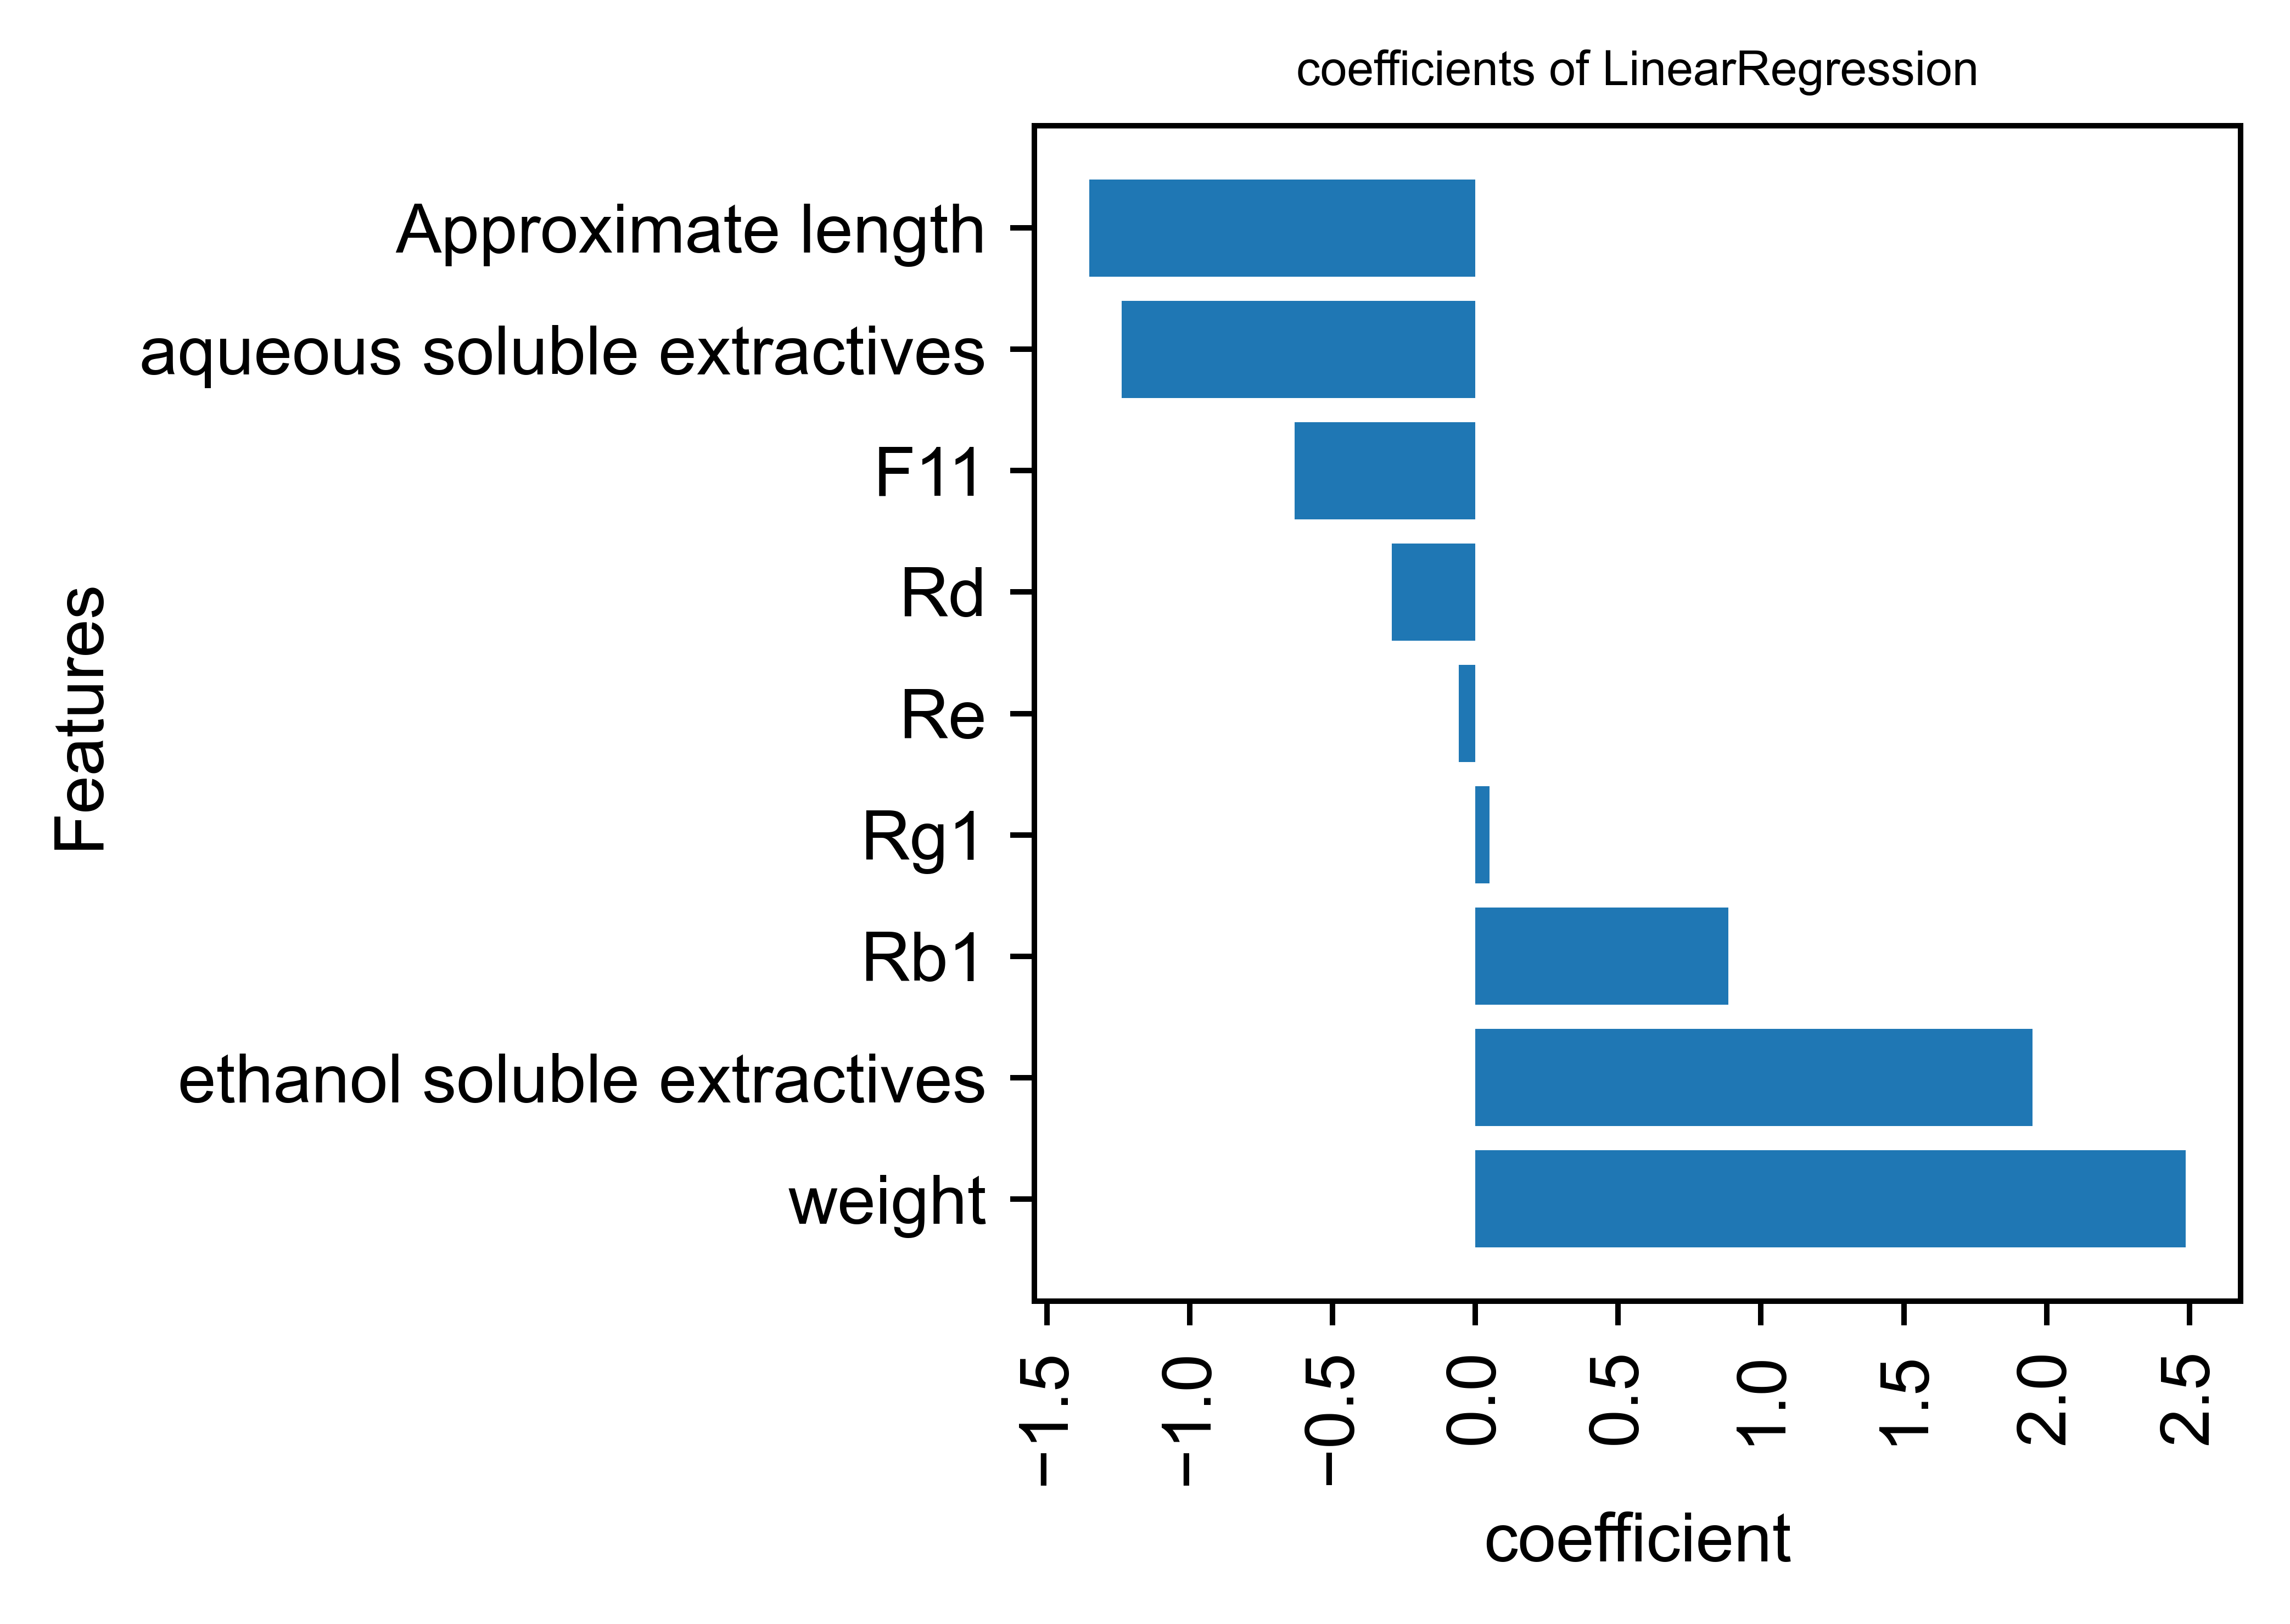

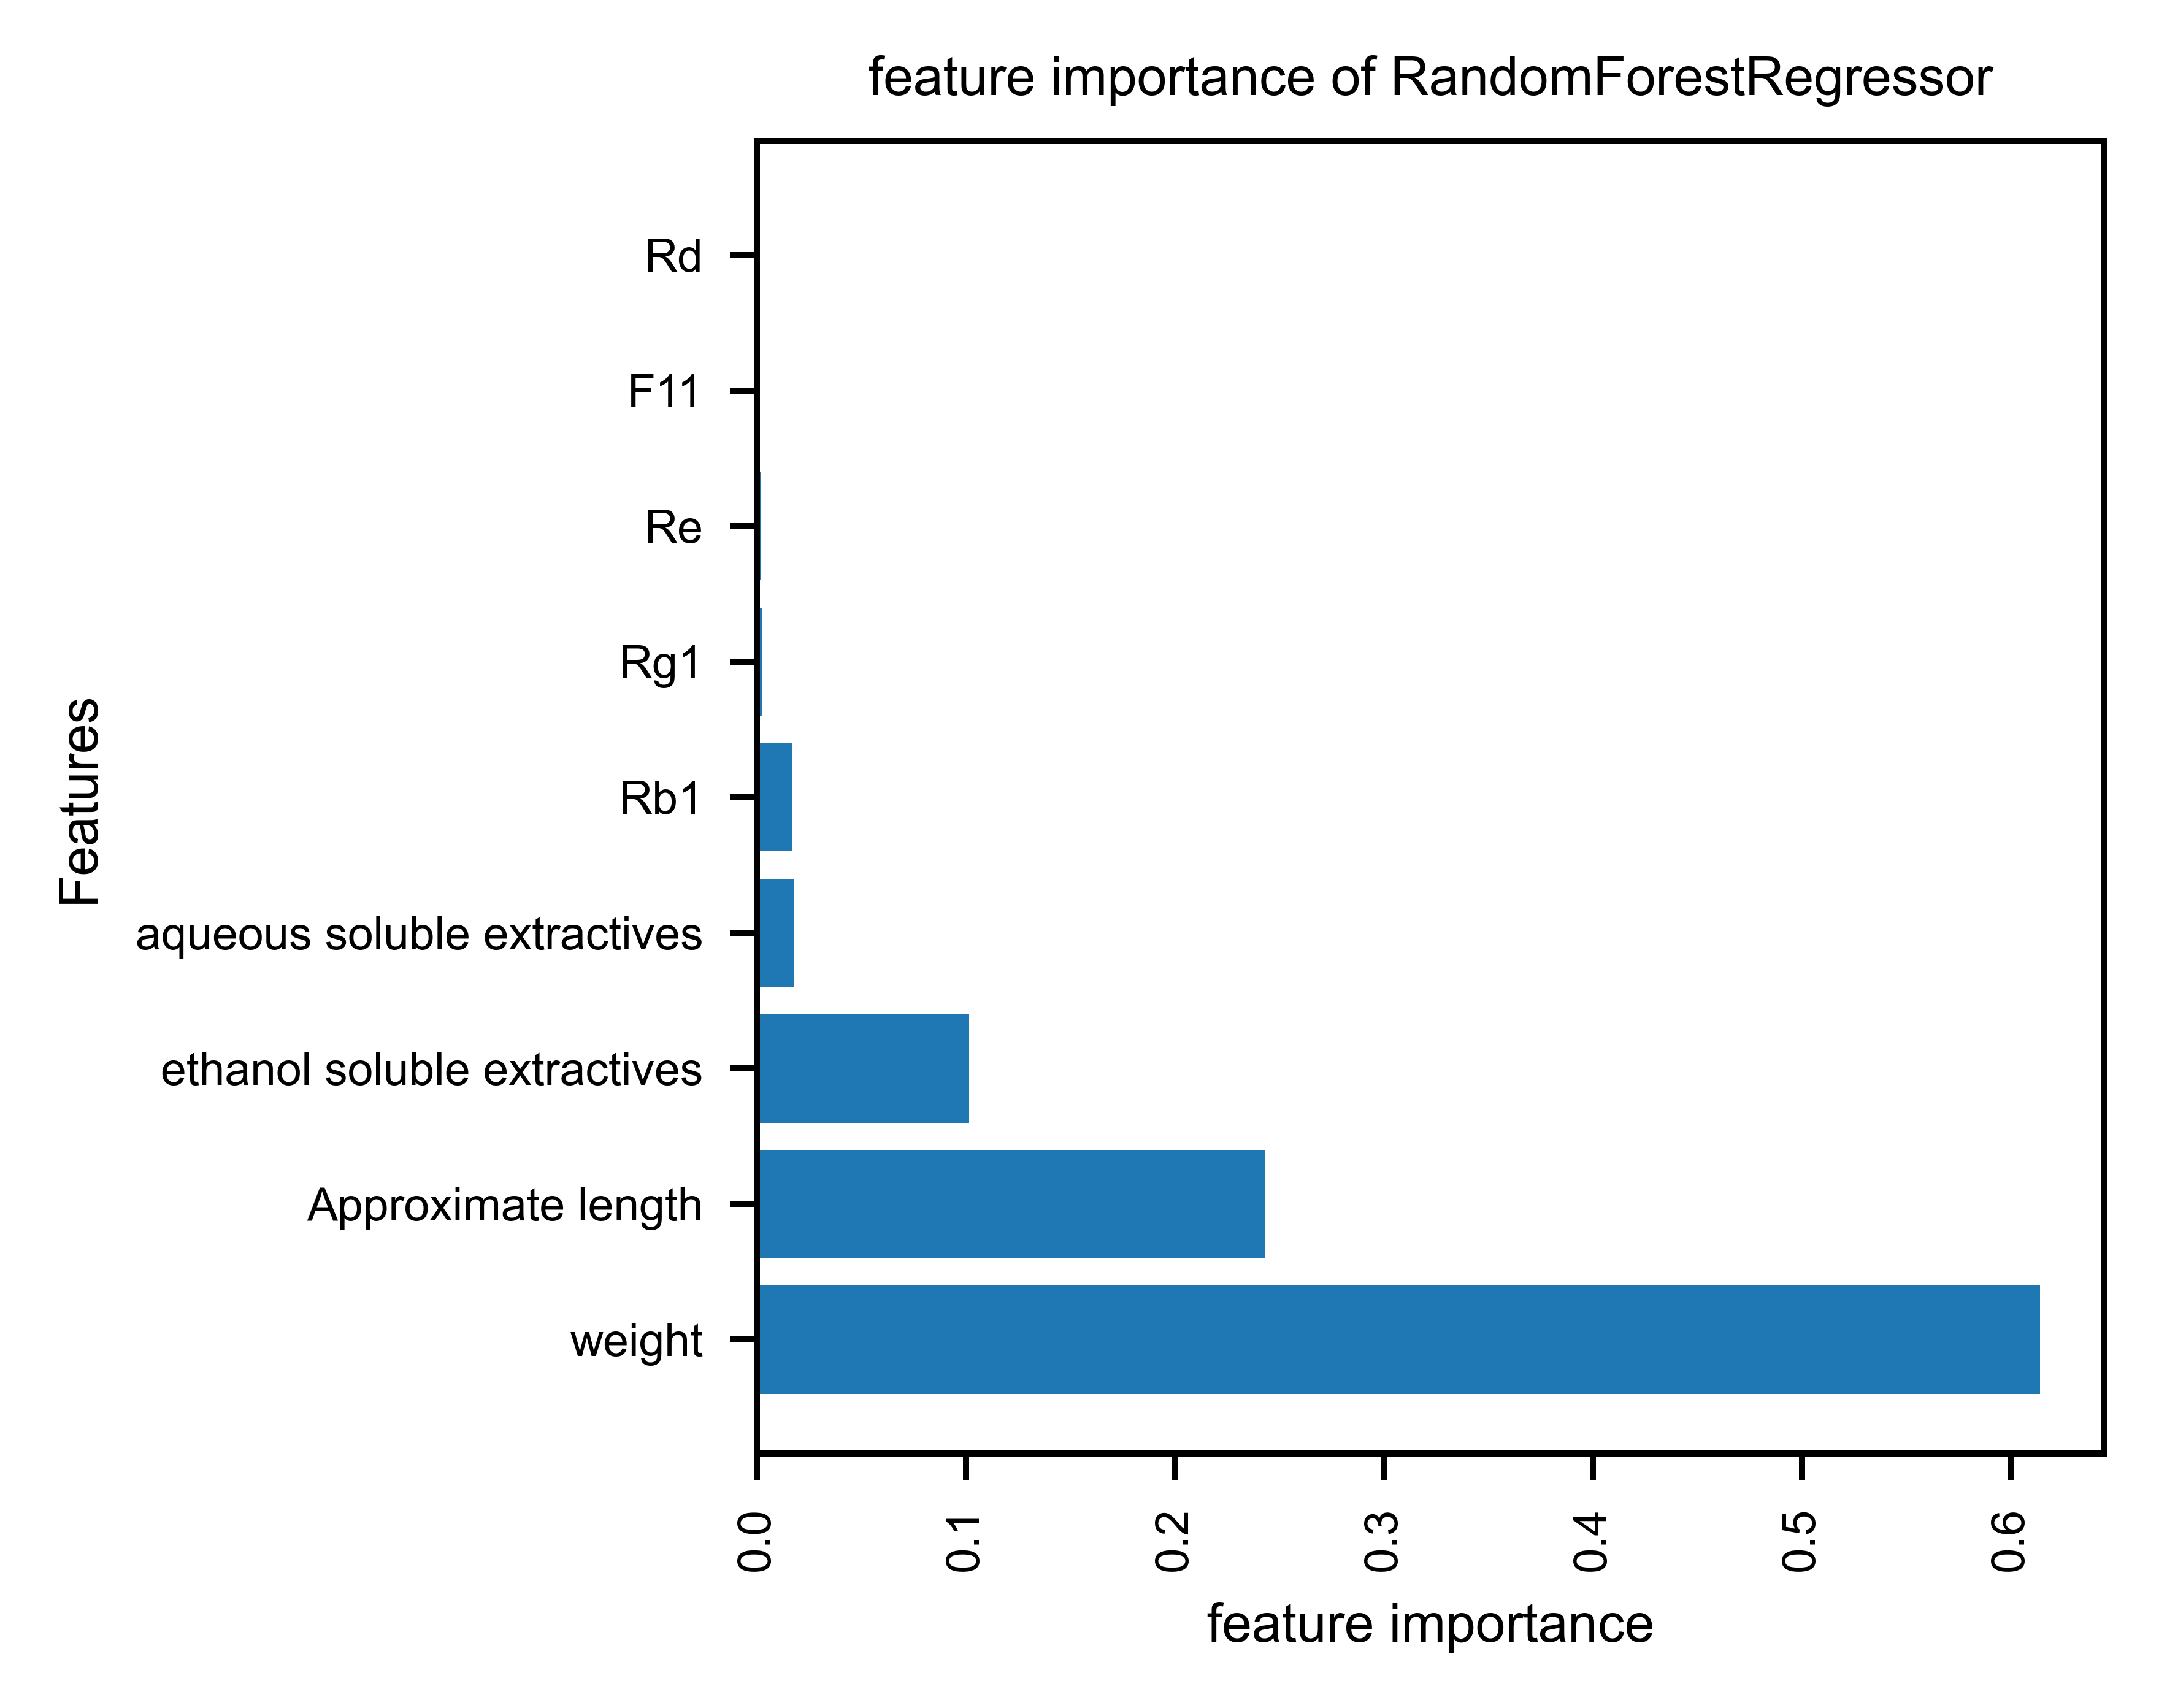

In [16]:
# 设置绘图参数
plot.plot_setting(figsize=None, x_label='',y_label='Features')
# 绘制特征重要性
plot.plot_feature_importance_from_model(model, save=True)

In [17]:
# 保存模型
model.save_model('panax_predictor', False)

In [18]:
model = load_object('./data/panax_predictor.pkl')

# 特征筛选与改进模型

In [19]:
data = Data()

In [20]:
training_data = 'data.xlsx'
label_col = 'age'
# 删除无关列和不重要的特征
drop_col = ['cultivation region', 'Rg1 (%)', 'Rd (%)', 'Re (%)', 'F11 (%)']
data.load_data(training_data, label_col, drop_col)

Number of data set: 106
Number of features: 5


In [21]:
data.df_x_columns = [i.split('(')[0].strip(' ') for i in data.df_x_columns]

In [22]:
data.feature_standardize('MinMaxScaler')

In [23]:
data.data_sampling(stratify='random', test_size=0.2, rand=1)

number of training set: 84
number of test set: 22


In [24]:
model = RegressionModel(data=data)

84 training data and 22 test data detected in Data!


In [25]:
model.set_candidates(candidates)

In [26]:
tune_df = model.model_tuning(scoring=['neg_mean_squared_error', 'r2'])

Tuning:  LinearRegression
Using time: 0.06

Tuning:  RandomForestRegressor
Using time: 452.21

================ model_tuning | Time: 0.0h 7.0min 32s ================



In [27]:
best_df = model.best_model_select(rank='neg_mean_squared_error')

,rank_test_neg_mean_squared_error,rank_test_r2,mean_test_neg_mean_squared_error,mean_test_r2,std_test_neg_mean_squared_error,std_test_r2,algorithm,params
0,1,1,-0.140400,0.781547,0.020412,0.037884,LinearRegression,{}
162,1,1,-0.063921,0.896751,0.040627,0.067141,RandomForestRegressor,"{'max_depth': 5, 'max_features': 'auto', 'min_..."


============== best_model_select | Time: 0.0h 0.0min 0s ==============



In [28]:
evaluate = model.best_model_evaluate(['mean_squared_error', 'r2_score'])

,rank_test_neg_mean_squared_error,rank_test_r2,mean_test_neg_mean_squared_error,mean_test_r2,std_test_neg_mean_squared_error,std_test_r2,algorithm,params,train_mean_squared_error,test_mean_squared_error,all_mean_squared_error,train_r2_score,test_r2_score,all_r2_score
0,1,1,-0.140400,0.781547,0.020412,0.037884,LinearRegression,{},0.128955,0.120139,0.125626,0.761873,0.615595,0.744124
162,1,1,-0.063921,0.896751,0.040627,0.067141,RandomForestRegressor,"{'max_depth': 5, 'max_features': 'auto', 'min_...",0.013148,0.015621,0.010167,0.978459,0.949661,0.982063


============= best_model_evaluate | Time: 0.0h 0.0min 1s =============



In [45]:
for index, row in model.best_df.iterrows():
    model_key = row['algorithm']
    if model_key != 'RandomForestRegressor':
        continue
    model_params = row['params']
    estimator = model._MODEL[model_key]
    estimator.set_params(**model_params)
    
    # 设置参数
    if hasattr(estimator, 'max_iter'):
        estimator.max_iter = model.max_iter
    if hasattr(estimator, 'n_jobs'):
        estimator.n_jobs = model.n_jobs
    if hasattr(estimator, 'random_state'):
        estimator.random_state = model.model_random_state

    # 训练和预测
    estimator.fit(model.x_train, model.y_train)
    y_test_pred = estimator.predict(model.x_test)

In [38]:
y_test_pred

array([3.92755556, 2.75333333, 4.        , 3.95555556, 2.98222222,
       4.        , 3.99666667, 4.        , 2.99888889, 4.        ,
       3.99222222, 3.99333333, 3.58961905, 4.        , 3.01333333,
       3.67628571, 2.98222222, 4.        , 2.00333333, 3.99      ,
       3.96311111, 4.        ])

In [47]:
from sklearn import metrics

In [48]:
metrics.mean_squared_error(model.y_test, y_test_pred)

0.015621385327194832